# College Completion Dataset Analysis

Welcome to this Jupyter Notebook where we'll be exploring and analyzing a college completion dataset. In today's world, college education is an important factor for social and economic mobility, however, the completion rates of college students are not always satisfactory. With the right tools and techniques, we can analyze the factors affecting graduation rates and help students succeed.

In this notebook, we'll be using Python to analyze a college completion dataset (cc_institution_details.csv) obtained from Kaggle (https://www.kaggle.com/datasets/thedevastator/boost-student-success-with-college-completion-da?select=cc_institution_details.csv). The dataset contains information on over 3,800 degree-granting institutions in the United States, including demographic data, financial aid data, and completion rates.

In this notebook, we'll be answering three main questions based on the data:

* What effect do an institution's characteristics have on their graduation rate?
* Does full-time faculty have an effect on student retention rate?
* Which type of institution awards the most degrees?

We'll start by exploring the dataset and cleaning the data before moving on to performing statistical analysis to answer these questions and gain insights into the underlying patterns and relationships in the data. We'll use various Python libraries such as Pandas, Numpy, and Matplotlib to perform our analysis and visualise the data using various graphs and charts.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import f_oneway, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
sns.set_theme(style="whitegrid")

### Describe the Data

First, we'll start by importing the data as a pandas dataframe before exploring it as a whole, looking at the number of rows and columns and the basic descriptive statistics for the numerical columns. 

In [2]:
df = pd.read_csv('./cc_institution_details.csv')
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
num_rows, num_cols

(3798, 63)

In [4]:
df.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


In [5]:
df.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

The dataset contains 3798 rows and 63 columns, 51 of which are numerical. Already we can see that some columns might have outliers, such as _student_count_, _awards_per_value_, _aid_value_ etc. There's also a lot of numerical columns to work with yet quite a lot of them seem to be paired i.e. there is a '_value' and '_percentile' column for the same field, which could suggest that one of them could be used for statistical analysis instead of both.

### Remove Duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df[df['chronname'].isin(df['chronname'][df['chronname'].duplicated()])]

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
3027,3027,245421,Metro Business College,Rolla,Missouri,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,100733|100928|103529|105136|108056|110501|1123...,19,81,47.6|10,NaN,20.0
3028,3028,245430,Metro Business College,Jefferson City,Missouri,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,100733|100928|103529|105136|108056|110501|1123...,19,81,57.9|10,NaN,55.0
3528,3528,444389,Anamarc College,El Paso,Texas,2-year,Private for-profit,Associates--Private For-profit,NaN,NaN,...,NaN,NaN,NaN,NaN,450447|444565|447953|145309|446817|450702|4045...,37,517,NaN,NaN,642.0
3697,3697,451945,ITT Technical Institute-Madison,Madison,Alabama,4-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9,83,NaN,NaN,NaN
3701,3701,451981,ITT Technical Institute-Madison,Madison,Wisconsin,4-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15,83,NaN,NaN,NaN
3739,3739,455673,Metro Business College,Arnold,Missouri,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19,81,92.3|10,NaN,24.0
3746,3746,456393,ITT Technical Institute-Madison,Madison,Mississippi,2-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6,83,78.8|10,NaN,NaN
3784,3784,459815,Anamarc College,Santa Teresa,New Mexico,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8,81,NaN,NaN,NaN


No duplicated rows in the dataset so we don't need to drop any rows at this point. There are 8 rows that have a duplicated _chronname_ (institution name) however they all have unique _unitid_ (Department of Education Unit ID number) so are likely to be different campuses of the same institution, especially given that they are in different locations.

### Remove Unecessary Columns

In [8]:
df.drop(['long_x', 'lat_y'], axis=1, inplace=True)

After looking closely at the dataset, there are a few columns that appear to contain non-useful information regarding the three quesstions that I proposed earlier. Some of these, such as _site_ and _nicknames_, I have decided to keep and convert into a flag to indicate, for example, if an institution has a website or not. Others, such as _long_x_ and _lat_y_ I have decided to drop as geographical data is already contained in _city_ and _state_ and more granualar detail isn't required.

### Convert column data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  site                                  3779 non-null   object 
 11  student_count    

In [10]:
print(set(df.dtypes))
df_float = df.select_dtypes(include='float64')
df_float.describe()

{dtype('float64'), dtype('int64'), dtype('O')}


,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,...,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,cohort_size
count,3798.000000,3798.000000,3798.000000,3794.000000,1337.000000,1337.000000,3797.000000,3797.000000,2.323000e+03,2323.000000,...,279.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3467.000000
mean,23.435176,22.845656,22.484044,71.092198,1059.889304,49.801047,7960.445878,49.991046,3.254405e+04,49.948773,...,9.925090,51.186667,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,658.306028
std,10.615140,6.322818,4.770449,25.056818,132.819927,29.006569,6419.658196,28.922664,1.233173e+05,28.951584,...,4.075698,16.562107,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,961.782580
min,0.500000,3.200000,16.500000,3.800000,666.000000,0.000000,294.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000
25%,17.300000,19.300000,21.500000,49.800000,974.000000,25.000000,4018.000000,25.000000,1.431000e+03,25.000000,...,7.200000,43.200000,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,131.000000
50%,21.300000,22.200000,22.500000,77.000000,1040.000000,49.000000,5207.000000,50.000000,5.466000e+03,50.000000,...,9.400000,52.100000,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,356.000000
75%,26.500000,24.200000,24.600000,93.900000,1123.000000,75.000000,9343.000000,75.000000,1.949050e+04,75.000000,...,11.950000,61.375000,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,782.500000
max,137.600000,59.900000,32.800000,100.000000,1534.000000,100.000000,41580.000000,100.000000,2.505435e+06,100.000000,...,33.700000,88.000000,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,16229.000000


The dataset contains data as either objects, floats or ints, with the majority being of the first two types. Looking more closely at the float type variables, we can see many more columns have extreme outliers than we previously thought although perhaps the percentile columns standardise these therefore it will be worth exploring using these columns for statistical analysis instead.

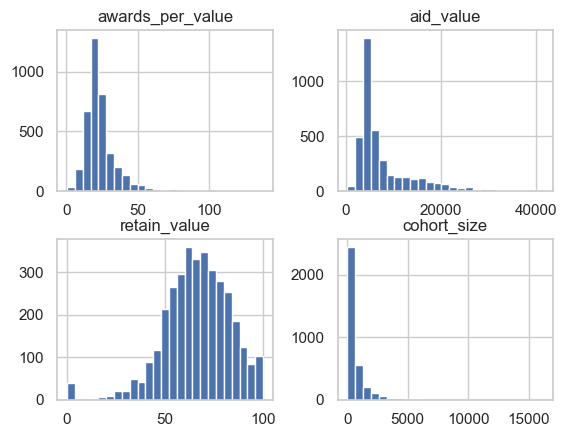

In [11]:
df.hist(column=['awards_per_value', 'aid_value', 'retain_value', 'cohort_size'], bins=25);

These histograms easily demonstrate the outliers in the columns we previously saw. Some of these variables, in particular the _retain_value_ variable, will be used to answer one of our questions therefore the outliers will need to be handled to produce more accurate insights. We can also see some right skewness in the _awards_per_value_, _aid_value_ and _cohort_size_ variables and left skewness in _retain_value_.

In [12]:
df_object = df.select_dtypes(include='object')
object_col_list = list(df_object.columns)
cat_col_list = object_col_list[3:5]
object_col_list = object_col_list[6:]
df_cat = df.copy()

for col in object_col_list:
    df_cat[f'{col}_flag'] = np.where(df_cat[col].isna(), 0, 1)
df_cat.drop(columns=object_col_list, axis=1, inplace=True)

for var in cat_col_list:
    df_cat = pd.concat([df_cat.drop(var, axis=1), pd.get_dummies(df_cat[var], prefix=var, prefix_sep='_')], axis=1)


In [13]:
df_cat.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'basic',
       'student_count', 'awards_per_value', 'awards_per_state_value',
       'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value',
       'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value',
       'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
   

Here we converted 6 binary object cols (_hbcu_, _flagship_, _site_, _similar_, _counted_pct_ and _nicknames_) into flag columns, which have the suffix _flag_. We also made dummy columns for 2 categorical variables _level_ and _control_ which have the nomenclature of the original column as a prefix and the specifc category as the suffix.

### Missing Data

In [14]:
null_cols_per_row = list(df_cat.isnull().sum(axis=1))
null_cols_per_row_count = [[x, null_cols_per_row.count(x), round((x/num_cols)*100,2)] for x in set(null_cols_per_row)]
df_missing_rows = pd.DataFrame(null_cols_per_row_count, columns =['No. of missing columns', 'Count of rows', 'Percentage of missing columns'])
df_missing_rows

,No. of missing columns,Count of rows,Percentage of missing columns
0,0,238,0.00
1,2,31,3.17
2,4,1,6.35
3,8,8,12.70
4,12,1,19.05
5,17,1039,26.98
6,19,934,30.16
7,21,1126,33.33
8,22,13,34.92
9,23,88,36.51


In [15]:
df[object_col_list].isna().sum().reset_index(name='missing count')

,index,missing count
0,hbcu,3704
1,flagship,3748
2,site,19
3,similar,219
4,counted_pct,426
5,nicknames,3488


The **df_missing_rows** dataframe above shows the number of NaN values in a row, the number of occurances in the full dataset, and finally the percentage of missing row data in the dataset. It seems that the max number of missing columns in a row is 31 which accounts for nearly 50% of data.

Now that we have already converted some object columns to flags or dummy variables, we have already dealt with some missing data in these columns and so the maximum number of NaN values in any row in the dataset has decreased to 31. Given that not all of the columns will be needed to answer our questions, I'll hold off on dealing with the NaN values until it's necessary to do so.

In [16]:
col_percent_missing = df_cat.isnull().sum() * 100 / len(df_cat)
col_count_missing = df_cat.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': df_cat.columns,
                                 'percent_missing': col_percent_missing,
                                 'count_missing': col_count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(20)

,column_name,percent_missing,count_missing
vsa_grad_after6_transfer,vsa_grad_after6_transfer,92.890995,3528
vsa_grad_after4_transfer,vsa_grad_after4_transfer,92.890995,3528
vsa_enroll_elsewhere_after6_transfer,vsa_enroll_elsewhere_after6_transfer,92.890995,3528
vsa_enroll_after6_transfer,vsa_enroll_after6_transfer,92.890995,3528
vsa_grad_elsewhere_after6_transfer,vsa_grad_elsewhere_after6_transfer,92.890995,3528
vsa_grad_elsewhere_after4_transfer,vsa_grad_elsewhere_after4_transfer,92.890995,3528
vsa_enroll_elsewhere_after4_transfer,vsa_enroll_elsewhere_after4_transfer,92.890995,3528
vsa_enroll_after4_transfer,vsa_enroll_after4_transfer,92.890995,3528
vsa_enroll_after4_first,vsa_enroll_after4_first,92.654028,3519
vsa_enroll_elsewhere_after6_first,vsa_enroll_elsewhere_after6_first,92.654028,3519


17 columns have over 90% of their data missing but all the NaN values in these columns correspond with each othe and are in the same rows. This makes it appropriate to drop these columns from the dataset. All 17 of these columns are the vsa_ columns which relate to the number of full-time students who enrolled/transferred at different time points.

In [17]:
no_missing = list(df_cat.columns[df_cat.isna().any() == False])
print(f"The number of columns with no missing data: {len(no_missing)}")
vsa_missing_cols = list(df_cat.columns[df_cat.isnull().mean() > 0.90])
print(f"Columns with >90% missing data and will be dropped: {vsa_missing_cols}")
df_cat.drop(vsa_missing_cols, axis=1, inplace=True)

The number of columns with no missing data: 29
Columns with >90% missing data and will be dropped: ['vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer']


In [18]:
new_null_cols_per_row = list(df_cat.isnull().sum(axis=1))
new_null_cols_per_row_count = [[x, new_null_cols_per_row.count(x), round((x/num_cols)*100,2)] for x in set(new_null_cols_per_row)]
new_df_missing_rows = pd.DataFrame(new_null_cols_per_row_count, columns =['No. of missing columns', 'Count of rows', 'Percentage of missing columns'])
new_df_missing_rows

,No. of missing columns,Count of rows,Percentage of missing columns
0,0,1285,0.00
1,2,965,3.17
2,4,1128,6.35
3,5,13,7.94
4,6,88,9.52
5,7,27,11.11
6,9,180,14.29
7,10,1,15.87
8,11,107,17.46
9,14,4,22.22


Now that the vsa_ columns have been dropped, the largest number of missing data in a row has dropped to 14 (22% of row data)

### Correlation between variables

C:\Users\sarin\AppData\Local\Temp\ipykernel_22872\1105523028.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cat.corr().abs());


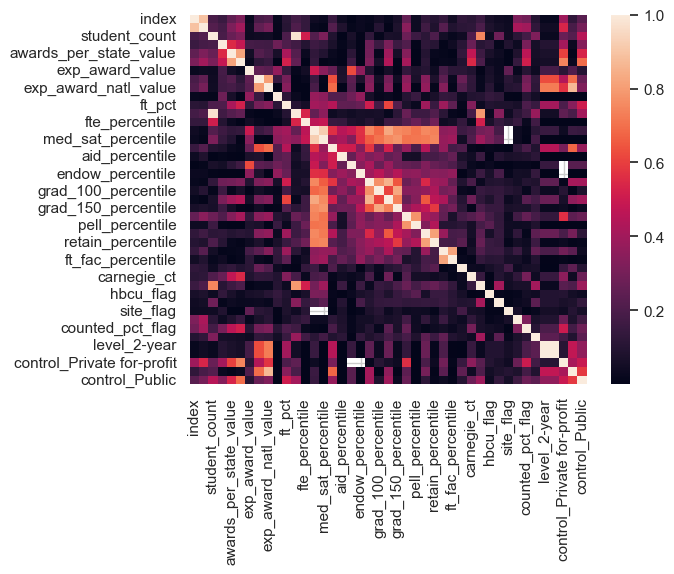

In [17]:
sns.heatmap(df_cat.corr().abs());

In [18]:
au_corr = df_cat.corr().abs()
upper = au_corr.where(np.triu(np.ones(au_corr.shape), k=1).astype(bool))
df_corr = upper.stack().sort_values(ascending=False).reset_index(name='corr')
df_corr.rename(columns={"level_0": "var1", "level_1": "var2"}, inplace=True);

C:\Users\sarin\AppData\Local\Temp\ipykernel_22872\1072458395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  au_corr = df_cat.corr().abs()


In [19]:
df_corr.head(10)
# Some vars very closely related e.g. vsa_grad_after4_transfer & vsa_grad_after6_transfer, and med_sat_value & med_sat_percentile, obviously
# If building a model, could use one instead of both and reduce overfitting

,var1,var2,corr
0,level_2-year,level_4-year,1.000000
1,student_count,fte_value,0.974339
2,med_sat_value,med_sat_percentile,0.920985
3,index,unitid,0.891251
4,exp_award_natl_value,control_Private not-for-profit,0.869761
5,grad_100_value,grad_150_value,0.853982
6,grad_100_percentile,grad_150_percentile,0.824847
7,med_sat_value,grad_150_value,0.824688
8,ft_fac_value,ft_fac_percentile,0.820059
9,awards_per_state_value,awards_per_natl_value,0.818052


In [20]:
df_corr.tail(10)

,var1,var2,corr
889,med_sat_percentile,counted_pct_flag,0.000140
890,fte_percentile,level_4-year,0.000115
891,fte_percentile,level_2-year,0.000115
892,exp_award_natl_value,fte_percentile,0.000110
893,state_sector_ct,level_4-year,0.000074
894,state_sector_ct,level_2-year,0.000074
895,aid_percentile,control_Public,0.000056
896,awards_per_natl_value,aid_percentile,0.000038
897,fte_percentile,control_Private not-for-profit,0.000018
898,awards_per_natl_value,pell_percentile,0.000004


## Question 1: What effect do an institution's characteristics have on their graduation rate?

In [21]:
print(df_cat['grad_100_value'].isna().sum())
print(df_cat['grad_150_value'].isna().sum())
print(df_cat[(df_cat['grad_100_value'].isna() == True) & (df_cat['grad_150_value'].isna() == True)].shape[0])
df_grad_clean = df_cat.dropna(subset=['grad_100_value'])
# 331 rows missing grad_100 and grad_150 cols, missings in both cols (and in percentile ones) correlate

331
331
331


In [22]:
df_corr[(df_corr['var1'] == 'grad_100_value') | (df_corr['var2'] == 'grad_100_value')]
# grad_100_value correlates strongly with: med_sat_value, aid_value, retain_value, ft_pct, 
# Surprisingly no correlation with cohort_size
# As expected grad 100 and grad 150 highly correlated = 0.854
# Could build a model that would predict one and not include the other as a var - model will predict graduation rate overall
# Could build a model that predicts one using the other

,var1,var2,corr
5,grad_100_value,grad_150_value,0.853982
15,grad_100_value,grad_100_percentile,0.771771
18,med_sat_value,grad_100_value,0.751950
38,med_sat_percentile,grad_100_value,0.656782
40,grad_100_value,grad_150_percentile,0.645231
50,aid_value,grad_100_value,0.575879
58,grad_100_value,retain_value,0.540277
67,ft_pct,grad_100_value,0.509987
98,endow_value,grad_100_value,0.421828
104,grad_100_value,control_Private not-for-profit,0.412118


C:\Users\sarin\AppData\Local\Temp\ipykernel_22872\1876103611.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="grad_100_value", y="cohort_size", data=df_grad_clean, palette="Dark2", s=20)


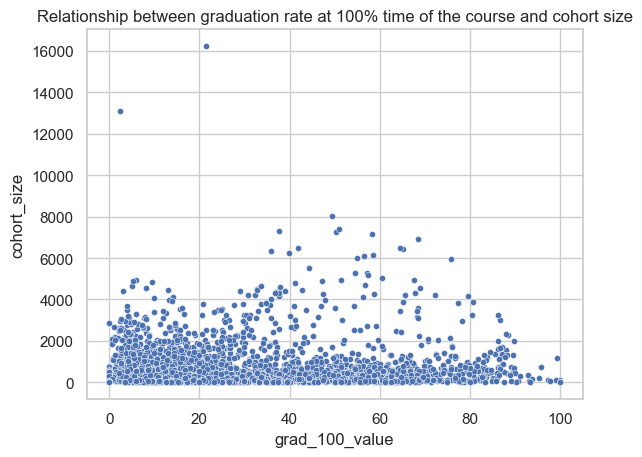

In [29]:
sns.scatterplot(x="grad_100_value", y="cohort_size", data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between graduation rate at 100% time of the course and cohort size")
plt.show()
# Awful plot, supports the weak correlation (0.030278) we see above

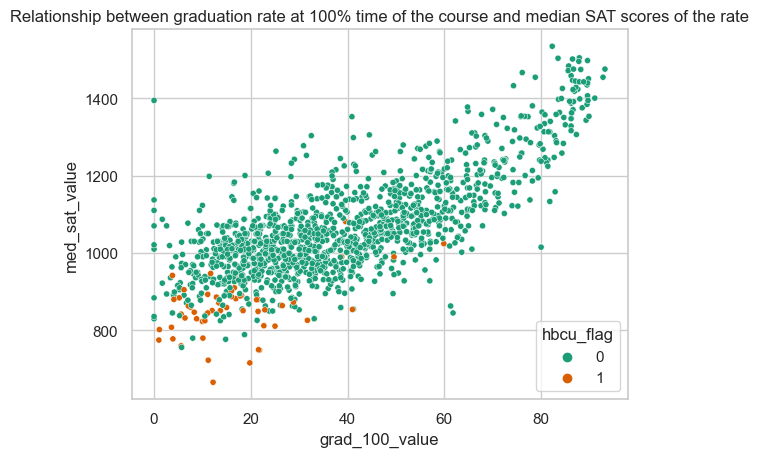

In [24]:
sns.scatterplot(x="grad_100_value", y="med_sat_value", hue='hbcu_flag', data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between graduation rate at 100% time of the course and median SAT scores of the rate")
plt.show()
# Seems that control has a way of splitting up the data, looking at 2 corners of the grap, same with hbcu_flag

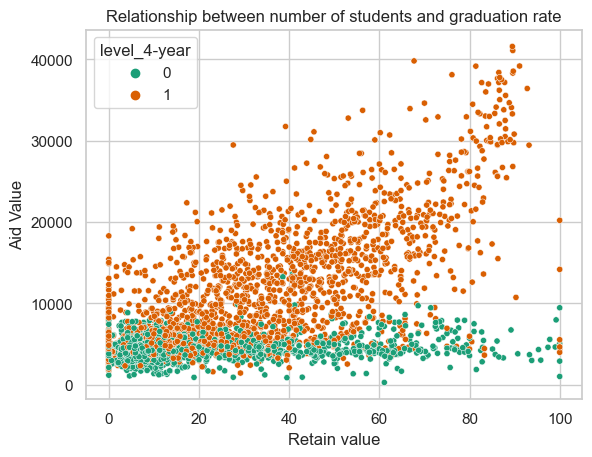

In [30]:
sns.scatterplot(x="grad_100_value", y="aid_value", hue='level_4-year', data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between number of students and graduation rate")
plt.xlabel('Retain value');
plt.ylabel('Aid Value');
plt.show()

In [ ]:
# Try a model first that doesn't use categorical variables
random.seed(234)
num_vars = df_grad_clean[['grad_100_value', 'med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value']]
df_dropna = num_vars.dropna(axis=0)
X = df_dropna[['med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value']]
y = df_dropna['grad_100_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=12)
grad_100_model = LinearRegression()
grad_100_model.fit(X_train, y_train)

y_test_preds = grad_100_model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_preds)}")
# 1285 rows left when dropping NAs in variables used, a third of the original dataset
# 0.72 R suqaured score which is a fairly good model, it's saying that 72% of variance in predictions can be explained by the model
# aid_value and retain_value has outliers as we saw before

R2 Score: 0.722754611405394
Mean Squared Error: 119.64492113881381


In [ ]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,38.9,37.938936,0.961064
1,0.0,21.427819,-21.427819
2,70.9,61.839693,9.060307
3,20.5,34.829136,-14.329136
4,65.2,59.462562,5.737438
...,...,...,...
420,36.8,46.712731,-9.912731
421,35.0,27.269685,7.730315
422,17.7,14.711290,2.988710
423,14.3,20.797709,-6.497709


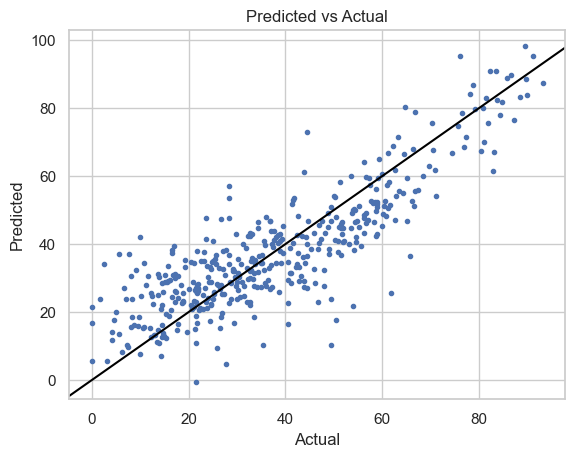

In [ ]:
# We can plot how far our predictions are from the actual values compared to the predicted values
# High R2 value can be seen by the points being close to the black line
# For lower graduation rates (between  0-30), tended to overpredict, but from 30 onwards in tended to underpredict the actual values
# Homoscedasticity - equal variance of points about the line

plt.plot(preds_vs_act['actual'], preds_vs_act['preds'], 'bo', markersize = 3);
plt.axline((0, 0), slope=1, color="black")
plt.title("Predicted vs Actual")
plt.xlabel('Actual');
plt.ylabel('Predicted');

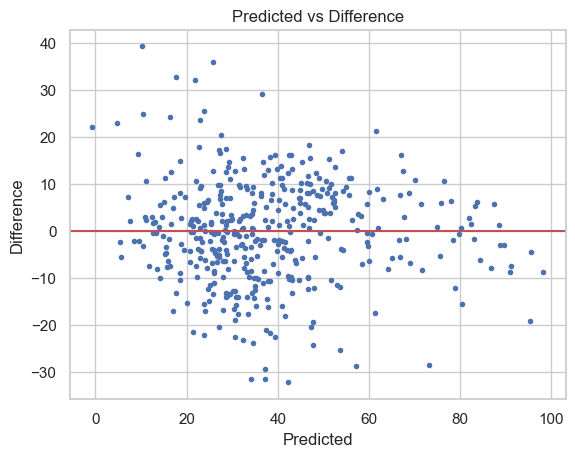

In [ ]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo', markersize = 3);
plt.axhline(0, color='r')
plt.title("Predicted vs Difference")
plt.xlabel('Predicted');
plt.ylabel('Difference');
# evenly spread out about the line = equally likely to underpredicted as we are overpredict
# Homoscedasticity
# Can miss miss graduation rate by up to 40

In [ ]:
# Now we explore the effect of categorical variables.
StatesGroupLists = df_grad_clean.groupby('state')['grad_100_value'].apply(list)
AnovaResults = f_oneway(*StatesGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])
# Want to check for correlation between state and grad 100 val
# Looks like there's no correlation, F stats is low, but p value is tiny (<0.05) therefore suggests that the correlation is statistically 
# significant
# Probably because there are too many categories within this variable - 52 of them

F_onewayResult(statistic=6.499571860621484, pvalue=1.1333458086297473e-39)
P-Value for Anova is:  1.1333458086297473e-39


In [ ]:
ControlGroupLists = df_grad_clean.groupby('control_Private not-for-profit')['grad_100_value'].apply(list)
AnovaResults = f_oneway(*ControlGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])
# Want to check for correlation between control and grad 100 val
# Looks like there's no correlation, F stats is higher, but p value is even tinier (<0.05) therefore suggests that the correlation is 
# statistically significant

F_onewayResult(statistic=708.8991823696218, pvalue=2.906367573237671e-142)
P-Value for Anova is:  2.906367573237671e-142


In [ ]:
ControlGroupLists = df_grad_clean.groupby('control_Public')['grad_100_value'].apply(list)
AnovaResults = f_oneway(*ControlGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])
# Want to check for correlation between control and grad 100 val
# Looks like there's no correlation, F stats is higher, but p value is even tinier therefore (<0.05) therefore suggests that the 
# correlation is statistically significant

F_onewayResult(statistic=697.5968193990866, pvalue=3.2095602218549383e-140)
P-Value for Anova is:  3.2095602218549383e-140


In [ ]:
# Now try a model that usse categorical variables, specifically control since the corr above showed ~0.45
random.seed(234)
num_cat_vars = df_grad_clean[['grad_100_value', 'med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
df_dropna = num_cat_vars.dropna(axis=0)
print(df_dropna.shape[0])
X2 = df_dropna[['med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value',   'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
y2 = df_dropna['grad_100_value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.33, random_state=12)
grad_100_model_cat = LinearRegression()
grad_100_model_cat.fit(X_train2, y_train2)

y2_test_preds = grad_100_model_cat.predict(X_test2)
print(f"R2 Score: {r2_score(y_test2, y2_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test2, y2_test_preds)}")
# Same number of rows left (1285) when dropping NAs in variables used, a third of the original dataset
# 0.74 R suqaured score so MARGINALLY better than previous model and given that R2 adds a penalty for every variable added, this means 
# that adding the extra variables had enough of a benefit to outweigh the penalty
# aid_value and retain_value has outliers as we saw before

1285
R2 Score: 0.7407053941706672
Mean Squared Error: 111.89828196397242


In [ ]:
preds_vs_act2 = pd.DataFrame(np.hstack([y_test2.values.reshape(y_test2.size,1), y2_test_preds.reshape(y_test2.size,1)]))
preds_vs_act2.columns = ['actual', 'preds']
preds_vs_act2['diff'] = preds_vs_act2['actual'] - preds_vs_act2['preds']
preds_vs_act2.head()

,actual,preds,diff
0,38.9,40.602104,-1.702104
1,0.0,31.142236,-31.142236
2,70.9,61.864511,9.035489
3,20.5,33.417183,-12.917183
4,65.2,61.195154,4.004846
...,...,...,...
420,36.8,44.880486,-8.080486
421,35.0,29.271090,5.728910
422,17.7,10.225274,7.474726
423,14.3,23.538746,-9.238746


## Question 2: Does full time faculty have an effect on student retention rate?

In [ ]:
q2_df = df_cat[['retain_value', 'ft_fac_value', 'retain_percentile', 'ft_fac_percentile', 'level_4-year', 'level_2-year', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
q2_df.describe()
# More missing in retain_value

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
count,3535.000000,3785.000000,3535.000000,3785.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,66.231853,45.107477,49.226591,49.473448,0.615850,0.384150,0.261190,0.328594,0.410216
std,17.033907,24.726902,29.175248,29.014201,0.486458,0.486458,0.439341,0.469764,0.491938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.100000,25.700000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.900000,41.500000,49.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,78.100000,63.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
col_percent_missing = q2_df.isnull().sum() * 100 / len(df)
col_count_missing = q2_df.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': q2_df.columns,
                                 'percent_missing': col_percent_missing,
                                 'count_missing': col_count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(20)

,column_name,percent_missing,count_missing
retain_value,retain_value,6.924697,263
retain_percentile,retain_percentile,6.924697,263
ft_fac_value,ft_fac_value,0.342285,13
ft_fac_percentile,ft_fac_percentile,0.342285,13
level_4-year,level_4-year,0.000000,0
level_2-year,level_2-year,0.000000,0
control_Private for-profit,control_Private for-profit,0.000000,0
control_Private not-for-profit,control_Private not-for-profit,0.000000,0
control_Public,control_Public,0.000000,0


In [ ]:
q2_df.dropna(subset=['retain_value', 'ft_fac_value'], inplace=True)
q2_df.shape[0]

C:\Users\sarin\AppData\Local\Temp\ipykernel_4504\3990187652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df.dropna(subset=['retain_value', 'ft_fac_value'], inplace=True)


3526

array([[<Axes: title={'center': 'retain_value'}>,
        <Axes: title={'center': 'ft_fac_value'}>]], dtype=object)

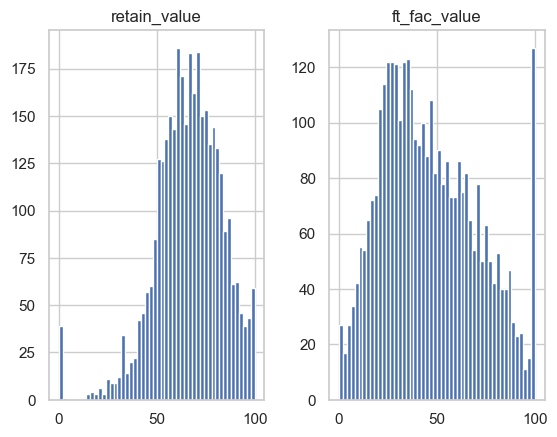

In [ ]:
q2_df.hist(column=['retain_value', 'ft_fac_value'], bins=50)
# retain_value and ft_fac_value have outliers (bottom and top of the graphs respectively) which could affect their corr

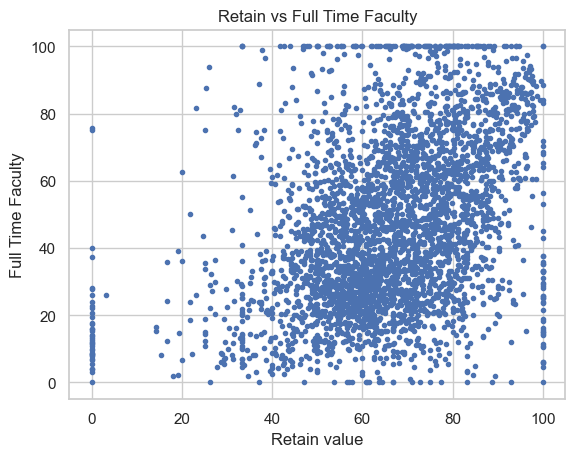

In [ ]:
plt.plot(q2_df['retain_value'], q2_df['ft_fac_value'], 'bo', markersize = 3);
plt.title("Retain vs Full Time Faculty")
plt.xlabel('Retain value');
plt.ylabel('Full Time Faculty');
# Looks like the 0 and 100 values on either end aren't reliable, they form a "box"

In [ ]:
q2_df['retain_value'].corr(q2_df['ft_fac_value'])
# Weak correlation, I wonder if removing outliers would make a difference?

0.3826807844228234

In [ ]:
q2_df['ft_fac_value'].value_counts().sort_values(ascending=False).head(20)
# Backs up histogram in that 115 rows have 100 ft_fac_value and then after that, the rest of the rows relate to the interquartile range 
# 27 rows have 0 value but it fits with the curve so we'll leave it for now

100.0    113
33.3      25
0.0       23
50.0      19
66.7      17
25.0      15
75.0      15
28.6      14
24.0      14
23.3      14
26.7      13
20.0      13
33.9      13
36.4      12
20.5      11
37.5      11
40.0      11
34.8      11
34.6      11
48.9      11
Name: ft_fac_value, dtype: int64

In [ ]:
q2_df_ft = q2_df[q2_df['ft_fac_value'] != 100]
q2_df_ft

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,63.1,82.8,17.0,89.0,1,0,0,0,1
1,80.2,92.4,70.0,98.0,1,0,0,0,1
2,37.5,67.2,2.0,71.0,1,0,0,1,0
3,81.0,65.5,72.0,56.0,1,0,0,0,1
4,62.2,67.0,15.0,58.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3792,33.3,28.6,1.0,37.0,0,1,0,0,1
3793,33.3,10.7,1.0,3.0,1,0,0,1,0
3794,74.4,44.4,47.0,39.0,1,0,0,1,0
3795,77.8,29.6,81.0,74.0,1,0,1,0,0


In [ ]:
q2_df['retain_value'].value_counts().sort_values(ascending=False).head(20)
# Again, backs up histogram - 52 rows have 100 ft_fac_value and then after that, the rest of the rows relate to the interquartile range 
# For this var, the 0 val is the culprit - 39 rows have 0 value and only 1 of the other top 20 rows by values have a retain_value lower than 50

100.0    52
66.7     44
0.0      39
50.0     39
75.0     27
33.3     27
83.3     22
60.0     22
58.3     21
62.5     19
78.6     18
60.4     16
78.9     16
69.2     16
80.0     16
61.4     15
62.8     15
71.7     15
71.9     14
59.2     14
Name: retain_value, dtype: int64

In [ ]:
q2_df_no_out = q2_df_ft[(q2_df_ft['retain_value'] != 0) & (q2_df_ft['retain_value'] != 100)]
q2_df_no_out

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,63.1,82.8,17.0,89.0,1,0,0,0,1
1,80.2,92.4,70.0,98.0,1,0,0,0,1
2,37.5,67.2,2.0,71.0,1,0,0,1,0
3,81.0,65.5,72.0,56.0,1,0,0,0,1
4,62.2,67.0,15.0,58.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3792,33.3,28.6,1.0,37.0,0,1,0,0,1
3793,33.3,10.7,1.0,3.0,1,0,0,1,0
3794,74.4,44.4,47.0,39.0,1,0,0,1,0
3795,77.8,29.6,81.0,74.0,1,0,1,0,0


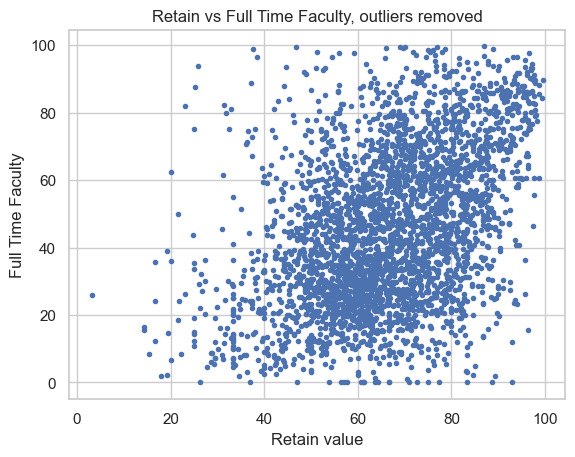

In [ ]:
plt.plot(q2_df_no_out['retain_value'], q2_df_no_out['ft_fac_value'], 'bo', markersize = 3);
plt.title("Retain vs Full Time Faculty, outliers removed")
plt.xlabel('Retain value');
plt.ylabel('Full Time Faculty');
# Looks like the 0 and 100 values on either end aren't reliable, they form a "box"

In [ ]:
corr_test_output = pearsonr(q2_df_no_out['retain_value'], q2_df_no_out['ft_fac_value'])
print(f"Correlation coefficient: {corr_test_output[0]}")
print(f"Two tailed p-value: {corr_test_output[1]}")
# Removing outliers improved correlation of the 2 vars, but not by much, from 0.38 to 0.42
# Pearsons r is not robust to outliers though so likely that score accuracy improved by removing them
# p value for T score is >0.05 therefore statistically significant. Can reject null hypothesis and accent the alternative hypothesis 
# that there is a statistically significant association between retain_value and ft_fac_value

Correlation coefficient: 0.4207763806103621
Two tailed p-value: 8.900805096197867e-143


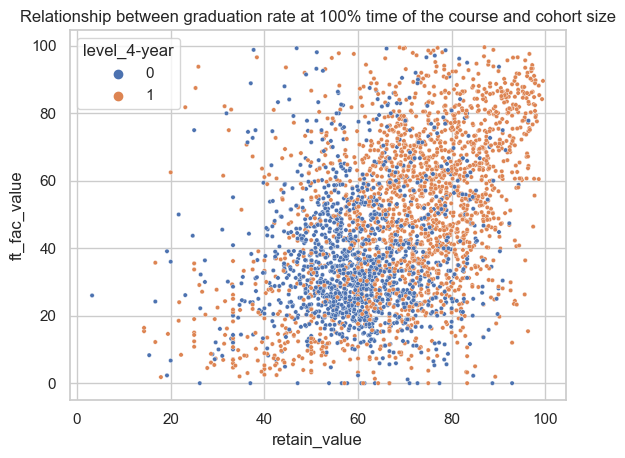

In [ ]:
sns.scatterplot(x="retain_value", y="ft_fac_value", data=q2_df_no_out, hue="level_4-year", s=10)
plt.title("Relationship between graduation rate at 100% time of the course and cohort size")
plt.xlabel('Retain value');
plt.ylabel('Full Time Faculty');
plt.show()

In [ ]:
model_vars = []
model_r2_score = []
model_mse = []

In [ ]:
# Model: X variables - ft_fac_value
random.seed(234)
X3 = q2_df_no_out['ft_fac_value'].values.reshape(-1, 1)
y3 = q2_df_no_out['retain_value'].values.reshape(-1, 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size= 0.33, random_state=12)
retain_model = LinearRegression()
retain_model.fit(X_train3, y_train3)

y3_test_preds = retain_model.predict(X_test3)
print(f"R2 Score: {r2_score(y_test3, y3_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test3, y3_test_preds)}")

model_vars.append('[\'ft_fac_value\']')
model_r2_score.append(r2_score(y_test3, y3_test_preds))
model_mse.append(mean_squared_error(y_test3, y3_test_preds))

R2 Score: 0.19123395153598366
Mean Squared Error: 195.2211639075491


In [ ]:
def retain_model_fn(cat_list):
    random.seed(234)
    num_cat_vars = q2_df_no_out[cat_list]
    df_dropna = num_cat_vars.dropna(axis=0)
    X = df_dropna[cat_list[1:]]
    y = df_dropna['retain_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=12)
    ln_model = LinearRegression()
    ln_model.fit(X_train, y_train)

    y_test_preds = ln_model.predict(X_test)
    
    model_vars.append(f"{cat_list[1:]}")
    model_r2_score.append(r2_score(y_test, y_test_preds))
    model_mse.append(mean_squared_error(y_test, y_test_preds))

In [ ]:
cat_list = [
['retain_value', 'ft_fac_value', 'level_4-year'],
['retain_value', 'ft_fac_value', 'control_Private for-profit', 'control_Public'],
['retain_value', 'ft_fac_value', 'level_4-year', 'control_Private for-profit', 'control_Public']]

for list in cat_list:
    retain_model_fn(list)

In [ ]:
model_dict = {'model_vars': model_vars, 'r2_score': model_r2_score, 'mse': model_mse}
retain_models_df = pd.DataFrame(model_dict)
retain_models_df
# R2 score improves throughout, but only marginally overall therefore adding in categorical variables hasn't improved the relationship 
# between retain_value and ft_fac_value. 'control' seems to be better than 'level' and the combination of the 2 is the best.

,model_vars,r2_score,mse
0,['ft_fac_value'],0.191234,195.221164
1,"['ft_fac_value', 'level_4-year']",0.228703,186.176929
2,"['ft_fac_value', 'control_Private for-profit',...",0.239988,183.452844
3,"['ft_fac_value', 'level_4-year', 'control_Priv...",0.248284,181.450256


## Question 3: Which type of institution awards the most degrees?

In [ ]:
q3_control_count = df['control'].value_counts().reset_index(name='count')
q3_control_group = df.groupby(["control"])['awards_per_value'].mean().reset_index(name='avg_award')

df_q3_control_final = pd.merge(q3_control_count, q3_control_group, left_on='index', right_on='control')
df_q3_control_final = df_q3_control_final[['control', 'count', 'avg_award']]
df_q3_control_final
# Far more Public schools, but private schools combined is the most
# mean awards given out follows the opposite trend - private for-profit schools give out the most awards and public the least

,control,count,avg_award
0,Public,1558,19.206739
1,Private not-for-profit,1248,22.995433
2,Private for-profit,992,30.629435


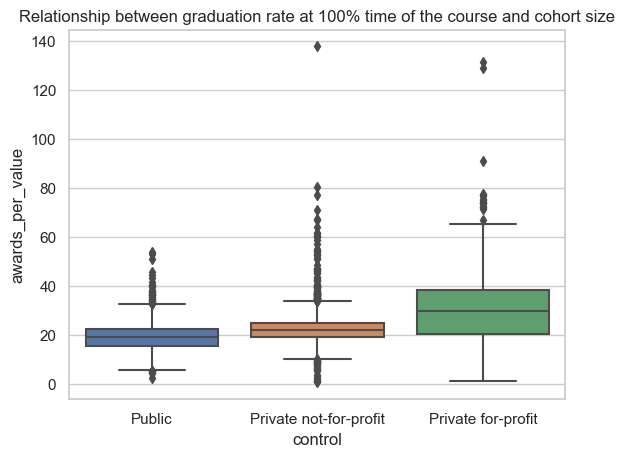

In [ ]:
sns.boxplot(x="control", y="awards_per_value", data=df)
plt.title("Relationship between Awards and Type of institution (Control)")
plt.show()

In [ ]:
q3_level_count = df['level'].value_counts().reset_index(name='count')
q3_level_group = df.groupby(["level"])['awards_per_value'].mean().reset_index(name='avg_award')

df_q3_level_final = pd.merge(q3_level_count, q3_level_group, left_on='index', right_on='level')
df_q3_level_final = df_q3_level_final[['level', 'count', 'avg_award']]
df_q3_level_final
# Samne trend as before. 4yr is the most common oinstitution but 2 year gives out slightly more awards per 100 students

,level,count,avg_award
0,4-year,2339,22.633690
1,2-year,1459,24.720082


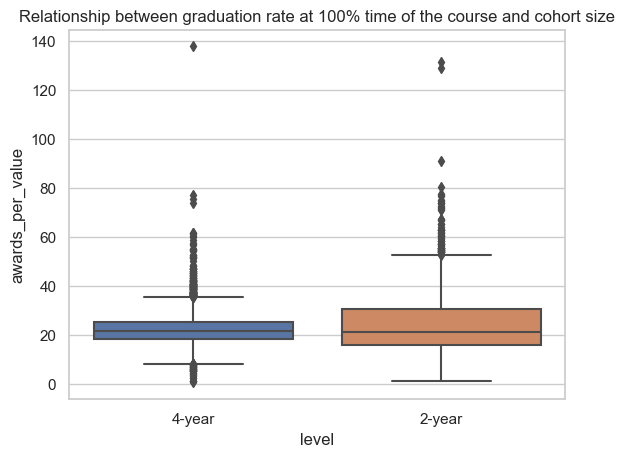

In [ ]:
sns.boxplot(x="level", y="awards_per_value", data=df)
plt.title("Relationship between graduation rate at 100% time of the course and cohort size")
plt.show()

In [ ]:
df.groupby(["level"])['awards_per_value'].mean().to_list()

[24.720082248115148, 22.633689610944845]

In [ ]:
df_q3 = df.groupby(["control", "level"]).size().reset_index(name="count")
df_q3['percent'] = round((df_q3['count']/df.shape[0])*100,2)
df_q3['mean_awards_per_value'] = df.groupby(["control", "level"])['awards_per_value'].mean().to_list()
df_q3.sort_values(by='count', ascending=False)
# Private not for profit is the most common, followed by public schools, 2 and 4yr
# Clearly most private not for profit schools are 4yr (~95%) instead of 2yr
# Split between 2 and 4yr for public (~60% 2yr) and private for profit (~53% 4yr) is more even
# Surprisingly the 2 least common types of institutions have the highest avg of awaeds given: 36 for private for profit 2yr and 

,control,level,count,percent,mean_awards_per_value
3,Private not-for-profit,4-year,1180,31.07,22.519407
4,Public,2-year,926,24.38,18.571814
5,Public,4-year,632,16.64,20.137025
1,Private for-profit,4-year,527,13.88,25.883681
0,Private for-profit,2-year,465,12.24,36.007957
2,Private not-for-profit,2-year,68,1.79,31.255882


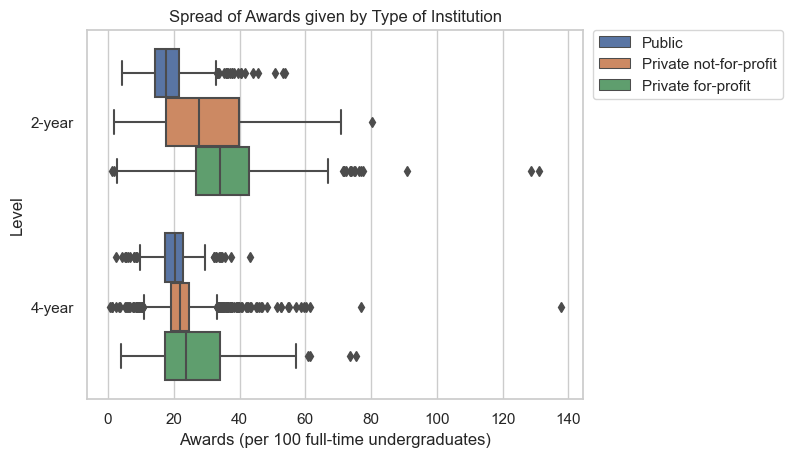

In [ ]:
plot = sns.boxplot(data=df, x="awards_per_value", y="level", hue="control", order=["2-year", "4-year"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plot.set(xlabel = 'Awards (per 100 full-time undergraduates)', ylabel = 'Level', title='Spread of Awards given by Type of Institution')
plt.show()

In [ ]:
# want to see avg awards per state by level and control
df_q3 = df.groupby(['state'])['awards_per_value'].mean().reset_index(name="avg_awards")
df_q3['avg_awards'] = round(df_q3['avg_awards'], 4)
df_q3.head()

,state,avg_awards
0,Alabama,19.5145
1,Alaska,18.4143
2,Arizona,25.5635
3,Arkansas,21.9708
4,California,22.7714


In [ ]:
df_q3_2

,state,level,awards_per_value
0,Alabama,2-year,31
1,Alabama,4-year,38
2,Alaska,2-year,2
3,Alaska,4-year,5
4,Arizona,2-year,32
...,...,...,...
96,West Virginia,4-year,21
97,Wisconsin,2-year,18
98,Wisconsin,4-year,53
99,Wyoming,2-year,8


In [ ]:
df_q3_2 = df.groupby(['state', 'level'])['awards_per_value'].count().reset_index()
df_q3_level = pd.pivot_table(df_q3_2, values='awards_per_value', index=['state'], columns=['level']).reset_index()
df_q3_level.fillna(0, inplace=True)

df_q3_level['2-year_perc'] = round(df_q3_level['2-year']/(df_q3_level['2-year']+df_q3_level['4-year']), 4)
df_q3_level['4-year_perc'] = round(df_q3_level['4-year']/(df_q3_level['2-year']+df_q3_level['4-year']), 4)

df_q3_level.drop(columns=['2-year', '4-year'], inplace=True)

df_q3_level_final = pd.merge(df_q3_level, df_q3, on='state').sort_values(by=['avg_awards'], ascending=False).head(15)
df_q3_level_final

,state,2-year_perc,4-year_perc,avg_awards
9,Florida,0.2557,0.7443,26.9926
44,Utah,0.1667,0.8333,26.8533
25,Missouri,0.3495,0.6505,26.7398
23,Minnesota,0.3663,0.6337,25.9406
2,Arizona,0.5079,0.4921,25.5635
15,Iowa,0.2951,0.7049,25.5361
16,Kansas,0.4677,0.5323,25.3887
42,Tennessee,0.3298,0.6702,25.1840
38,Pennsylvania,0.3917,0.6083,25.1636
47,Washington,0.4110,0.5890,24.9932


In [ ]:
df_q3_3 = df.groupby(['state', 'control'])['awards_per_value'].count().reset_index()
df_q3_control = pd.pivot_table(df_q3_3, values='awards_per_value', index=['state'], columns=['control']).reset_index()
df_q3_control.fillna(0, inplace=True)

df_q3_control['Private for-profit_perc'] = round(df_q3_control['Private for-profit']/(df_q3_control['Private for-profit']+df_q3_control['Private not-for-profit']+df_q3_control['Public']), 4)
df_q3_control['Private not-for-profit_perc'] = round(df_q3_control['Private not-for-profit']/(df_q3_control['Private for-profit']+df_q3_control['Private not-for-profit']+df_q3_control['Public']), 4)
df_q3_control['Public_perc'] = round(df_q3_control['Public']/(df_q3_control['Private for-profit']+df_q3_control['Private not-for-profit']+df_q3_control['Public']), 4)

df_q3_control.drop(columns=['Private for-profit', 'Private not-for-profit', 'Public'], inplace=True)

df_q3_control_final = pd.merge(df_q3_control, df_q3, on='state').sort_values(by=['avg_awards'], ascending=False).head(15)
df_q3_control_final

,state,Private for-profit_perc,Private not-for-profit_perc,Public_perc,avg_awards
9,Florida,0.4943,0.2727,0.2330,26.9926
44,Utah,0.4667,0.2667,0.2667,26.8533
25,Missouri,0.3786,0.3592,0.2621,26.7398
23,Minnesota,0.3267,0.2574,0.4158,25.9406
2,Arizona,0.5556,0.0635,0.3810,25.5635
15,Iowa,0.1803,0.5082,0.3115,25.5361
16,Kansas,0.1290,0.3387,0.5323,25.3887
42,Tennessee,0.3298,0.4362,0.2340,25.1840
38,Pennsylvania,0.2995,0.4378,0.2627,25.1636
47,Washington,0.1918,0.2192,0.5890,24.9932


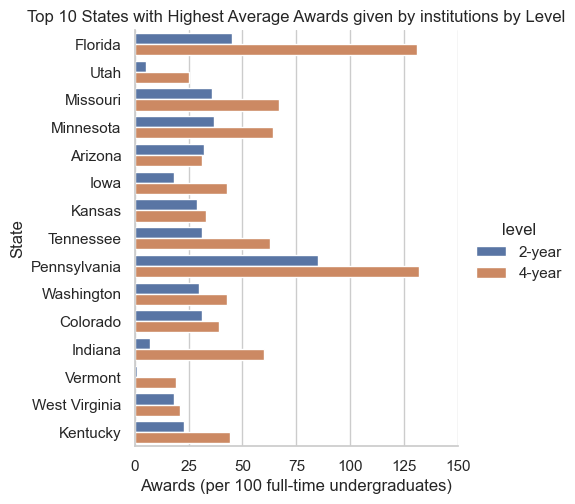

In [ ]:
plot_level = sns.catplot(data=df_q3_2, kind='bar', x='awards_per_value', y='state', hue='level', order=df_q3_level_final['state'])
plot_level.set(xlim=(0, 150), ylabel="State", xlabel="Awards (per 100 full-time undergraduates)", title='Top 15 States with Highest Average Awards given by institutions (by Level)');

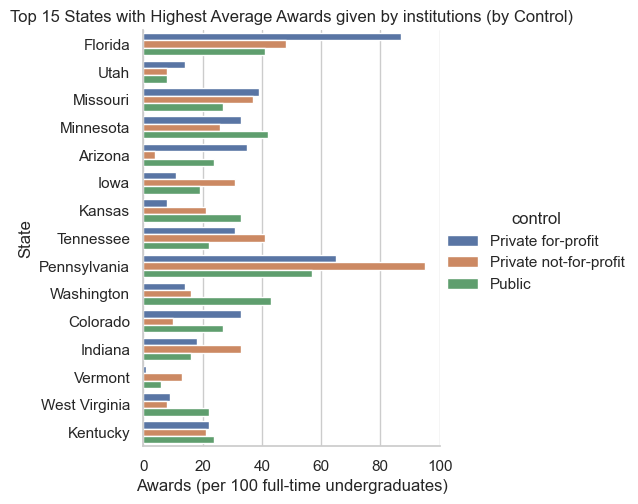

In [ ]:
plot_control = sns.catplot(data=df_q3_3, kind='bar', x='awards_per_value', y='state', hue='control', order=df_q3_control_final['state'])
plot_control.set(xlim=(0, 100), ylabel="State", xlabel="Awards (per 100 full-time undergraduates)", title='Top 15 States with Highest Average Awards given by institutions (by Control)');